## Imports 

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score 


if not "root" in locals():
    current_path = Path(os.getcwd())
    root = current_path.parent.absolute()

In [3]:
os.chdir(root)
from data_treatment.box_creator import create_binary_box

df = pd.read_csv('database.csv')
df = create_binary_box(df, threshold=2., box_length=7).set_index("Date").dropna(axis = 0)

## Our model 

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

prescale_X = df.drop(columns="Box")
y = df["Box"]
x = (prescale_X - prescale_X.mean())/prescale_X.std()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
ridge = LogisticRegression(penalty="l2", solver="newton-cg", C = 0.3)
ridge.fit(X_train, y_train)

score= ridge.score(X_train, y_train)
score

0.7813953488372093

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

pipe_LogReg = make_pipeline(StandardScaler(),LogisticRegressionCV(fit_intercept=True, cv = 5, solver='newton-cg', penalty='l2'))
pipe_LogReg.fit(X_train,y_train)

score = pipe_LogReg.score(X_train, y_train)
print("Score: ", score)


def display_scores(scores):
    print("Scores:", score)
    print( "Mean:", score.mean())
    print("Standard deviation:", score.std())
    return 

#display_scores(score)


C:\Users\maria\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


KeyboardInterrupt: 

### Confusion Matrix

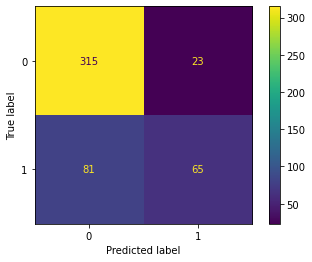

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(ridge, X_test, y_test)


## Lalala en cours, je finis demain matin youpi 

### Getting our precision and recall scores

In [11]:
print(precision_score(y_train, y_train_pred))
print(recall_score(y_train, y_train_pred))

0.6113744075829384
0.31009615384615385


### Getting our F1 score 

In [14]:
print(f1_score(y_train, y_train_pred))

0.4114832535885168


### The ROC Curve (receiver operating characteristic)\
plots the true positive rate against the false positive rate \
ie plots sensitivity versus 1- specificity 

In [27]:

y_scores= rc.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

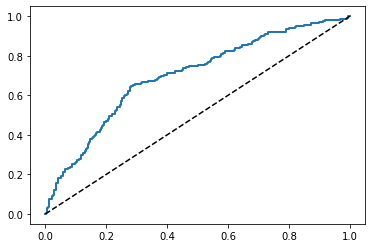

In [31]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label= label)
    plt.plot([0,1], [0,1], 'k--') 
    return 

plot_roc_curve(fpr, tpr)
plt.show()

### Area under the curve 

In [32]:
roc_auc_score(y_test, y_scores)

0.698943661971831